## Logistic Regression   
Reference from [https://gist.github.com/mGalarnyk/aa79813d7ecb0049c7b926d53f588ae1](https://gist.github.com/mGalarnyk/aa79813d7ecb0049c7b926d53f588ae1)


In [1]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression

Make a synthetic data set using make_classification

In [3]:
x, y = make_classification(n_samples=200, n_features=1, n_classes=2, n_clusters_per_class=1,flip_y=0.0,n_informative=1,n_redundant=0,n_repeated=0,random_state=197)

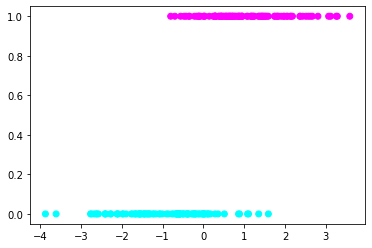

In [4]:
plt.scatter(x, y, c=y, cmap='cool')

In [5]:
# split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

# Model
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Logistic Regression Weights: ", lr.coef_)
print("Logistic Regression Constant: ", lr.intercept_)

print("\nConfusion Matrix:")
confusion_matrix(y_test, y_pred)
# lr.predict_proba(x_test)

Logistic Regression Weights:  [[2.06695821]]
Logistic Regression Constant:  [-0.07855725]

Confusion Matrix:


array([[18,  4],
       [ 1, 27]], dtype=int64)

(50, 1)


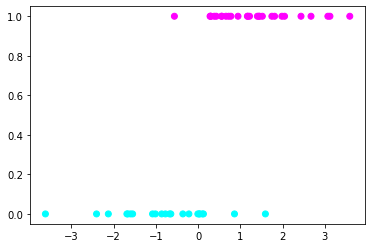

In [6]:
print(x_test.shape)

#Plotting only the test points
plt.scatter(x_test, y_test, c=y_test, cmap='cool')

In [7]:
print(lr.score(x_test,y_test))

0.9


In [8]:
def plot_decision_boundary(model, axis):
    x_min, x_max = axis[0] - .5, axis[1] + .5
    y_min, y_max = axis[2] - .5, axis[3] + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(xx.ravel().reshape(-1,1))
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    # plt.pcolormesh(xx, yy, Z, cmap='Wistia') 

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

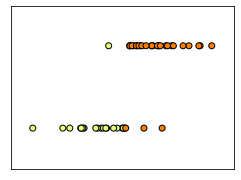

In [9]:
plot_decision_boundary(lr, axis=[-4, 4, 0, 1])
plt.scatter(x_test, y_test, c=y_pred, edgecolors='k', cmap='Wistia')
plt.show()

## MNIST

In [10]:
train_data = np.loadtxt('mnist_train.csv',delimiter=",")
test_data = np.loadtxt('mnist_test.csv',delimiter=",")

In [11]:
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


## Visualize Training Digits and Labels

In [12]:
x_train = train_data[:,1:]/255.0
x_test = test_data[:,1:]/255.0
y_train = train_data[:,0]
y_test = test_data[:,0]

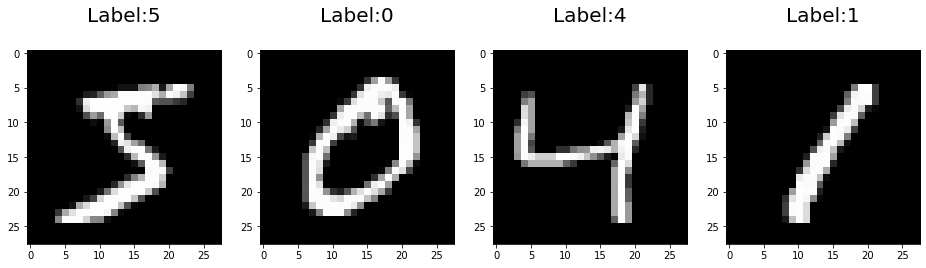

In [13]:
plt.figure(figsize=(16,4))
for index, (img, label) in enumerate(zip(x_train[0:4], y_train[0:4])):
  plt.subplot(1, 4, index+1)
  plt.imshow(np.reshape(img, (28,28)), cmap=plt.cm.gray)
  plt.title('Label:%i\n' % label, fontsize = 20)

In [14]:
#This is how the computer sees the number 4
#print(x_train[1])

## Logistic Regression

In [15]:
#Set to no penalty (regularization), 
#adjust from default solver and lower tolerance to speed up convergence

lgr = LogisticRegression(penalty='none', tol=0.01, solver='saga')
lgr.fit(x_train,y_train)

LogisticRegression(penalty='none', solver='saga', tol=0.01)

In [16]:
#Predict on test data
y_pred = lgr.predict(x_test)

In [17]:
from sklearn.metrics import classification_report                        
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       980
         1.0       0.96      0.98      0.97      1135
         2.0       0.93      0.90      0.91      1032
         3.0       0.90      0.91      0.91      1010
         4.0       0.94      0.93      0.94       982
         5.0       0.90      0.87      0.88       892
         6.0       0.94      0.95      0.95       958
         7.0       0.93      0.92      0.93      1028
         8.0       0.88      0.88      0.88       974
         9.0       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



## Model Performance 

In [18]:
score = lgr.score(x_test,y_test)
print(score)

0.9264


In [19]:
print(lgr.intercept_)

[-1.32164564  1.44985069  0.18874269 -0.72071598  0.26720747  2.18377178
 -0.55857572  1.37665583 -2.34122208 -0.52406903]


In [20]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 958    0    0    3    1    9    4    4    1    0]
 [   0 1112    5    1    0    2    3    1   11    0]
 [   5   10  928   17   10    3   14    9   32    4]
 [   4    1   16  922    0   25    3   10   21    8]
 [   1    3    7    3  918    0    8    5    7   30]
 [   9    2    3   34   10  778   14    7   31    4]
 [   8    3    8    2    6   15  913    2    1    0]
 [   1    7   23    8    6    1    0  949    2   31]
 [   9   11    6   22    7   29   13    9  857   11]
 [   9    8    1    9   21    7    0   19    6  929]]
